# TPC1 - Introdução à Teoria de Probabilidades

• Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio.

• Deve entregar ESTE Notebook de Jupyter.

• O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual.

• Não deve acrescentar ou apagar nenhuma célula.

• Todas as explicações devem ser claras e concisas.

• É preferível fazer menos e fazer bem que muito e mal.

• O pacote numba pode diminuir o tempo de cálculo.

• A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.



















In [ ]:
import numpy as np
from matplotlib.pylab import*
import numpy.random as rd
import scipy.stats
%matplotlib inline

# Problema 1
Uma distribuição conhecida é a distribuição exponencial, válida para uma variável real positiva x e que é determinada por um único parâmetro $\xi$,


\begin{equation}
    \rho\left(x;\xi\right)=\frac{e^{-\frac{x}{\xi}}}{\xi}
\end{equation}.

1. Determine uma expressão geral para todos os momentos $\left\langle{x^{n}}\right\rangle_{\rho}$ da distribuição $\rho\left(x;\xi\right)$.


A função geradora de momentos,$\langle x^n\rangle_\rho$ de uma dada distribuição de probabilidade $\rho(x)$ é dada por:

$$ \langle x^n\rangle_\rho=\int_{-\infty}^{+\infty}dx \space x^n\rho(x) $$

No entanto, a distribuição exponencial não está definida para valores negativos de $x$, logo:

$$ \langle x^n\rangle_\rho=\int_{0}^{+\infty}dx \space x^{n}\rho(x). $$

Se desginarmos este integral por $M_n$ podemos, através de integração por partes, chegar a uma relação de recorrência para obter qualquer momento:

$$ M_n = \int_{0}^{+\infty}x^n\frac{e^{-\frac{x}{\xi}}}{\xi}dx \\ M_n = \left[-x^n  e^{-x/\xi} \right]_{0}^{+\infty}+n\xi\int_{0}^{+\infty}dx x^{n-1}\frac{e^{-x/\xi}}{\xi} \\ M_n=0+\xi nM_{n-1} \\ M_n=\xi^n n!$$

Então, a expressão geral dos momentos é: $\langle x^n\rangle_{\rho}=\xi^n n!$

2. Usando a expressão da alínea anterior, calcule os cumulantes até $4^{\text{a}}$- ordem.

$$ \begin{cases}\langle x\rangle_{\rho}= \xi \\ \langle x^2\rangle_{\rho}=2\xi^2 \\ \langle x^3\rangle_{\rho}=6\xi^3 \\ \langle x^4\rangle_{\rho}=24\xi^4 \end{cases} $$

3. Determine a distribuição de probabilidade cumulativa $F\left(x\right)$ e a função quantil, $Q\left(y\right)=F^{-1}\left(y\right)$. Represente estas funções num gráfico.

A distribuição de probabilidade cumulativa, $F(x)$, correspondente a uma dada função densidade de probabilidade,$\rho(x)$ é dada por:

$$ F(x)=\int_{0}^{x}dx'\space\rho(x')=\int_{0}^{x}dx'\space \frac{e^{-\frac{x'}{\xi}}}{\xi}=\left[-e^{-\frac{x'}{\xi}} \right]_{0}^{x}=1-e^{-\frac{x}{\xi}} $$

Para obter a função quantil, $Q(y)=F^{-1}(y)$, igualamos a expressão da distribuição de probabilidade cumulativa a $y$ e resolvemos para $x$:

$$ y= 1-e^{-\frac{-x}{\xi}} \\ e^{-\frac{x}{\xi}}=1-y \\ x= -\xi \ln (1-y)$$

Então, a função quantil é dada por:

$$ Q(y)= -\xi \ln (1-y)$$

Verifica-se que a função quantil segue o comportamento da função densidade de probabilidade, isto é, umcomportamento exponencial. Toma valores entre 0 e 1!


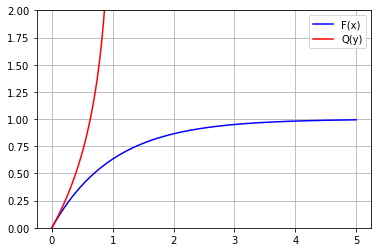

In [ ]:
def F(x,xi):
    '''
    F: distribuição de probabilidade cumulativa
    x: valores de uma dada amostra
    xi: parâmetro da distribuição
    '''
    return 1-exp(-x/xi)

def Q(y,xi):
    '''
    Q: função quantil
    y: valores correspondentes ao contradomínio da função de probabilidade cumulativa
    xi: parâmetro da distribuição
    '''
    return -xi*log(1-y)

vals = linspace(0,5,1000)
plot(vals,F(vals,1),color='b',label='F(x)');
plot(F(vals,1),Q(F(vals,1),1),color='r',label='Q(y)')
legend(),grid(),ylim(0,2)

print("Verifica-se que a função quantil segue o comportamento da função densidade de probabilidade, isto é, um"
     "comportamento exponencial. Toma valores entre 0 e 1!");

4. Calcule analiticamente a função característica, $\tilde{\rho}\left(q\right)$ da distribuição exponencial e deduza uma expressão geral para o cumulante de ordem $n$ - $\kappa_{n}$ - da distribuição.

A função caraterística de uma dada função densidade de probabilidade é dada pela respetiva transformada de Fourier:

$$ \tilde{p}(q)=\langle e^{-iqx}\rangle=\int dx \rho(x)e^{-iqx}=\int_{0}^{+\infty}dx \space e^{-iqx}\frac{1}{\xi}e^{-\frac{x}{\xi}}=\frac{1}{\xi}\int_{0}^{+\infty}e^{-x(1/\xi+iq)} =\frac{1}{\xi i q +1}$$

Sabemos também que a função geradora dos cumulantes é o logaritmo da função caraterística:

$$ \ln \tilde{p}(q)=\sum_{n=1}^{\infty}\frac{(-iq)^n}{n!}k_n \\ \ln(\frac{1}{1+\xi iq})=\sum_{n=1}^{\infty}\frac{(-iq)^n}{n!}k_n  \\ -\ln(1+\xi iq)=\sum_{n=1}^{\infty}\frac{(-iq)^n}{n!}k_n $$

E agora, podemos expandir o logaritmo usando:

$$ \ln(1+\epsilon)=\sum_{n=1}^{\infty}(-1)^{n+1}\frac{\epsilon^n}{n} $$

em que $\epsilon=\xi iq$. Assim:

$$ -\ln(1+\xi iq)=-\sum_{n=1}^{\infty}(-1)^{n+1}\frac{(\xi iq)^n}{n}=\sum_{n=1}^{\infty}(-1)^{n+2}\frac{(\xi iq)^n}{n}=\sum_{n=1}^{\infty}(-1)^{n}\frac{(\xi iq)^n}{n}  $$

Logo:

$$ \sum_{n=1}^{\infty}(-1)^{n}\frac{(\xi iq)^n}{n}=\sum_{n=1}^{\infty}\frac{(-iq)^n}{n!}k_n \\ \sum_{n=1}^{\infty}(-1)^{n}\frac{(\xi iq)^n}{n}=\sum_{n=1}^{\infty}(-1)^n\frac{(iq)^n}{n!}k_n$$

De onde se conclui que:

$$ k_n=\xi^n (n-1)! $$

# Problema 2
Nesta questão, a distribuição exponencial da questão anterior será estudada numericamente.
1. Implemente uma rotina que permita gerar uma amostra (de comprimento $N$) de números aleatórios positivos distribuídos com uma densidade $\rho\left(x;\xi\right)$. Utilize o método mais eficiente que conheça.

Para uma distribuição exponencial:

$$ \rho(x;\xi)=\frac{e^{-\frac{x}{\xi}}}{\xi} $$

a distribuição cumulativa, calculada em alíneas anteriores, é dada por:

$$ c(x)=1-e^{-x/\xi} $$

sendo assim possível gerar números usando o método da inversão no contínuo:

$$ c^{-1}(r)=\xi\ln\left( \frac{1}{1-r}\right) $$

em que $r$ é um número aleatório gerado uniformemente no intervalo $[0,1]$

In [ ]:
def GeraExp(N,xi):
    '''
    Método da Inversão para uma distribuição exponencial
    '''
    return xi*log(1/(1-rd.random_sample(N)))

2. Escreva uma função que calcule o histograma desta distribuição, de forma eficiente. Represente os histogramas para $\xi=1,4,16,64$, no mesmo painel. Reflicta sobre qual é a representação mais apropriada.

O método mais eficiente para gerar o histograma é o método de de inversão.

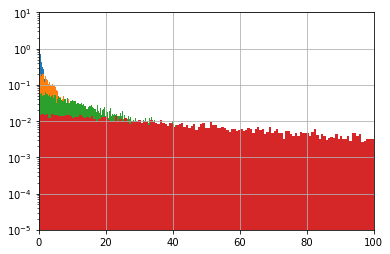

In [ ]:
Size = 10000
data = zeros([4,Size])
xis = [1,4,16,64]
for i in range(len(xis)):
    data[i] = GeraExp(Size,xis[i])

for i in range(len(data)):
    n, bins, patches = plt.hist(data[i],1000,density=True)
    yscale('log')
    xlim(0,100)
    ylim(1.e-5,10)
grid();

3. Utilize a rotinas da alínea 2.1 para gerar realizações aleatórias para o estimador do valor médio,

\begin{equation}
    \bar{X}_{N}=\frac{1}{N}\sum_{n=1}^{N}x_{i}
\end{equation}

,com $N$ variáveis (onde $x_{i}$ são as variáveis independentes com distribuição exponencial). Utilizando $\xi=1$ e aumentando $N$ calcule o erro quadrático médio na determinação da média $\left\langle x \right\rangle_{\rho}$ e identifique qual o comportamento assimptótico desse erro com $N$.

Um estimador para o valor médio pode ser obtido a partir da amostragem de $N$ elementos com uma dada probabilidade:

$$ \bar{X}=\frac{1}{N}\sum_{i=0}^{N-1}x_i $$

sendo que no limite em que o $N$ tende para infinito, o estimador tende para a média:

$$ \lim_{N \to +\infty}\frac{1}{N}\sum_{i=1}^{N}x_i =\langle x\rangle$$

O erro quadrático médio é dado (depois de tomada a raiz quadrada)por $ \langle (\bar{X}-\langle x \rangle)^2\rangle $.

Em que $\langle x\rangle$ é o momento de ordem 1, calculado no exercicío 1, que é $\xi$.

O erro quadrático médio para N=100 é 0.0025046985234471308 ,o que já é bastante reduzido
Verifica-se que com o aumento do número de experiências o erro quadrático médio diminui muito rapidamente,sendo inversamente proporcional ao tamanho da amostra


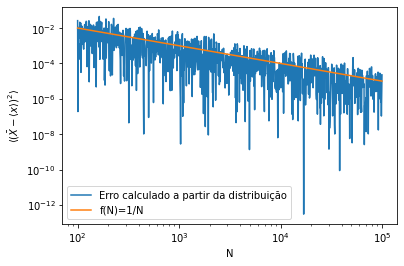

In [ ]:
# consideremos um conjunto de variáveis com distribuição exponencial para um dado N
M = 100
Xi = 1
variaveis = GeraExp(M,Xi)

# o estimador do valor médio soma todas as variáveis dividindo pelo número total
Estim = sum(variaveis)/M
eqm = (Estim-1)**2

print("O erro quadrático médio para N="+str(M)+ " é "+str(eqm)+" ,o que já é bastante reduzido")

Estimadores=zeros(1000)
Nserro = np.logspace(2,5,1000)
for i in range(len(Nserro)):
    Estimadores[i] = sum(GeraExp(int(Nserro[i]),Xi))/int(Nserro[i])

plot(Nserro,(Estimadores-1)**2,label='Erro calculado a partir da distribuição')
plot(Nserro,1/Nserro,label='f(N)=1/N')
xscale('log')
xlabel('N')
yscale('log')
ylabel(r'$\langle (\bar{X}-\langle x \rangle)^2\rangle$')
legend();

print("Verifica-se que com o aumento do número de experiências o erro quadrático médio diminui muito rapidamente,"
      "sendo inversamente proporcional ao tamanho da amostra")

4. Como sabe, o estimador $\bar{X}_{N}$ é uma variável aleatória com uma dada distribuição (dependente de $N$). Escreva uma rotina que gere amostras independentes de $\bar{X}_{N}$, com $N>1$ fixo.

#Responda Aqui

In [ ]:
def Xn(M,N,xi):
    Estims = zeros(M)
    for i in range(M):
        variaveis = GeraExp(N,xi)
        Estims[i] = sum(variaveis)/N
    return Estims

5. Represente os histogramas de $\bar{X}_{N}$ e prove numericamente a emergência do Teorema de Limite Central quando $N$ é suficientemente grande. Utilize $\xi=1$ e $N=4,16,64,256,1024$.

Pela representação gráfica elaborada, chega-se à conclusão que a distribuição do estimador do valor médio é uma distribuição Gaussiana (Normal), tal como o Teorema do Limite Central Prevê.

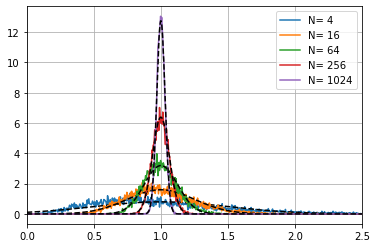

In [ ]:
def Gauss(x,m,s):
    '''
    m,s: média e desvio padrão para representação de uma distribuição Gaussiana
    '''
    expo= - 0.5 * ((x-m)/s)**2
    return np.exp(expo)/(s*(2*np.pi)**0.5)

def hist(amostra,a,b,M):
    '''
    amostra: conjunto de valores que seguem uma dada densidade de probabilidade
    a,b: limites para o cálculo dos valores retornados para a representação do histograma
    M: tamanho dos bins do histograma
    '''
    h = np.zeros(M)
    indices = ((amostra-a)/(b-a)*M).astype('int')
    for i in indices:
        h[i] += 1
    dx = (b-a)/M
    x = linspace(a+dx/2,b-dx/2,M)
    return x,h/len(amostra)/dx

Ns = [4,16,64,256,1024]
Xns = array([zeros(10000),zeros(10000),zeros(10000),zeros(10000),zeros(10000)])
for i in range(len(Ns)):
    Xns[i] = Xn(10000,Ns[i],1)
    xn,yn = hist(Xns[i],-100,100,50000)
    plot(xn,yn,label='N= '+str(Ns[i]))
    plot(xn,Gauss(xn,1,1/sqrt(Ns[i])),"k--") # verificar que se aproximam de uma distribuição Gaussiana
    xlim(0,2.5)
    grid(),legend()

6. Repita a análise para $\xi=10$ e analize, qualitativamente, se o $N$ a partir do qual $\bar{X}_{N}$ já tem uma distribuíção gaussiana aumentou ou diminuiu. Comente à luz do que sabe sobre o Teorema do Limite Central para uma soma de variáveis independentes.

Verifica-se que a partir de $N=4$, já temos uma distribuição Gaussiana

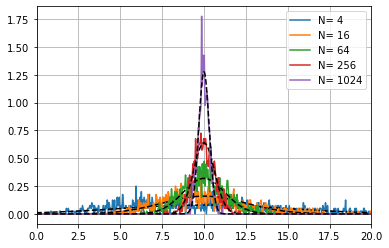

In [ ]:
Ns = [4,16,64,256,1024]
Xns = array([zeros(1000),zeros(1000),zeros(1000),zeros(1000),zeros(1000)])
for i in range(len(Ns)):
    Xns[i] = Xn(1000,Ns[i],10)
    xn,yn = hist(Xns[i],-1000,1000,50000)
    plot(xn,yn,label='N= '+str(Ns[i]))
    plot(xn,Gauss(xn,10,10/sqrt(Ns[i])),"k--") # verificar que se aproximam de uma distribuição Gaussiana
    xlim(0,20)
    grid(),legend()

# Problema 3
Considere uma variável aleatória com uma distribuição de Cauchy,

\begin{equation}
\rho_{\text{C}}\left(x;\mu,\gamma\right)=\frac{\gamma}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)},
\end{equation}

centrada em $x=\mu$ e com uma largura a meia-altura $\gamma$ em torno de $\mu$.
1. Calcule a função característica de $\rho_{\text{C}}\left(x;\mu,\gamma\right)$ e a função geradora dos cumulantes. Com isso, prove que todos os momentos e cumulantes desta distribuição não estão bem definidos.

Comecemos por escrever a distribuição da seguinte forma:

$$ \rho_c(x;\mu,\gamma)=\frac{1}{2\pi}\left[\frac{1}{\gamma+(x-\mu)i}+\frac{1}{\gamma - (x-\mu)i} \right] $$

Como foi referido nas alíneas anteriores, a função caraterística corresponde à transformada de Fourier da distribuição:

$$ \tilde{p}(k)=\int_{-\infty}^{+\infty}dx\rho(x:\mu,\gamma)e^{-ikx}=\frac{1}{2\pi}\left[\int_{-\infty}^{+\infty}\frac{e^{-ikx}}{\gamma +(x-\mu)i}dx+\int_{-\infty}^{+\infty}\frac{e^{-ikx}}{\gamma-(x-\mu)i} \right] $$

Como $\gamma>0$, podemos usar a seguinte propriedade:

$$ \frac{1}{\gamma +(x-\mu)i}=\int_{0}^{+\infty}dte^{-t(\gamma +(x-\mu)i)} \qquad\ \frac{1}{\gamma -(x-\mu)i}=\int_{0}^{+\infty}dte^{-t(\gamma -(x-\mu)i)} $$

Então:

$$ \tilde{p}(k) = \frac{1}{2\pi} \int_{-\infty}^{+\infty}dx \int_{0}^{+\infty}dt \left[ e^{-ikx-t(\gamma+i(x-\mu))}+e^{-ikx-t(\gamma-i(x-\mu))} \right] \\ \tilde{p}(k) = \frac{1}{2\pi}\int_{0}^{+\infty}e^{-t(\gamma -i\mu)}dt \int_{-\infty}^{+\infty}\left(e^{-ix(k+t)}+e^{-ix(k-t)} \right)dx  \\ \tilde{p}(k)=\int_{0}^{+\infty}e^{-t(\gamma -i\mu)}dt\left\{ \delta(k+t)+\delta(k-t)\right\} \\ \tilde{p}(k)=e^{-i\mu k}\left\{ e^{\gamma k}H(-k)+e^{-\gamma k}H(k) \right\} \\ \tilde{p}(k)=e^{-i\mu k-\gamma |k|} $$

Relativamente à função geradora dos cumulantes, já sabemos que se trata do logaritmo natural da função caraterística da distribuição:

$$ \ln \tilde{p}(k)= -i\mu k-\gamma |k| $$

Para estudar o comportamento dos momentos e cumulantes desta distribuição, consideremos a definição de momento de ordem $n$ de uma distribuição:

$$ \langle x^n \rangle = \int_{-\infty}^{+\infty} dx \rho(x)x^n $$

que também pode ser escrito da seguinte forma:

$$ \langle x^n \rangle=\lim_{a\to \infty}\left[\int_{a}^{+\infty}x^n \rho(x)dx + \int_{-\infty}^{a}x^n \rho(x)dx\right] $$

em que $a$ é um número real arbitrário.Os dois integrais que agora aparecem na expressão são divergentes e têm sinal oposto, o que mostra que os momentos não podem ser definidos. Consideremos o exemplo do momento de segunda ordem para o caso mais simples da distribuição ($\mu=0$ e $\gamma=1$)

$$ \int_{-\infty}^{\infty} \frac{x^{2}}{1+x^{2}} d x=\int_{-\infty}^{\infty} 1-\frac{1}{1+x^{2}} d x =
\int_{-\infty}^{\infty} d x-\int_{-\infty}^{\infty} \frac{1}{1+x^{2}} d x=\int_{-\infty}^{\infty} d x-\pi=\infty
$$

A função geradora dos cumulantes obtem-se, como foi feito antes, pelo logaritmo da função caraterística e uma posterior expansão em torno de 0. No entanto, verifica-se que esta função tem um módulo de $k$, que não é derivável em $k=0$, logo, não podemos fazer a expansão, o que mostra que todos os cumulantes não estão bem definidos.

In [ ]:
# Responda Aqui

2. Utilize a função característica calculada na alínea anterior para provar que dadas duas variáveis aleatórias, $X_{1,2}$, com distribuição de Cauchy $\rho_{\text{C}}\left(x;\mu,\gamma\right)$, uma combinação linear arbitrária delas — $Y=aX_{1}+bX_{2}$ — tem a distribuição

\begin{equation}
\rho\left(Y\right)=\frac{\left(\left|a\right|+\left|b\right|\right)\gamma}{\pi\left(\left(x-(a+b)\mu\right)^{2}+\left(\left|a\right|+\left|b\right|\right)^{2}\gamma^{2}\right)}.
\end{equation}

Pela alínea anterior, sabemos que a função caraterística da distribuição é dada por:

$$ \tilde{p}(k)=e^{-i\mu k -\gamma |k|} $$

sendo isto válido para uma variável aleatória $X$ que segue a distribuição de Cauchy. Se agora considerarmos a combinação linear de duas variáveis aleatórias,$Y=aX_1 +bX_2$, que seguem também uma distribuição Cauchy, a função caraterística será dada por:

$$ \tilde{p}(k)=e^{-i\mu(a+b) k -\gamma |k(a+b)|} $$

E, como tal, a distribuição de probabilidade é a transformada de Fourier Inversa da função caraterística:

$$ \rho(Y)=\frac{1}{2\pi}\int_{-\infty}^{+\infty}\tilde{p}(k)e^{ikx}dk $$

$$ \rho(Y)=\frac{1}{2\pi}\int_{-\infty}^{+\infty} e^{ikx}e^{-ik(a+b)\mu -|k|\gamma (a+b)}dk \\
    \rho(Y)=\frac{1}{2\pi}\left[ \int_{0}^{+\infty}e^{ikx-ik(a+b)\mu -|k|\gamma (a+b)}dk  + \int_{-\infty}^{0}
    e^{ikx-ik(a+b)\mu -|k|\gamma (a+b)}dk\right]  \\
     \rho(Y)=\frac{1}{2\pi}\int_{-\infty}^{0}e^{-k\gamma(|a|+|b|)}\left[e^{-ikx-ik(a+b)\mu}+e^{-ikx+ik(a+b)\mu}\right]dk \\   \rho(Y) = \frac{1}{2\pi}\int_{-\infty}^{0}dke^{+k(-\gamma (|a|+|b|)+ix-i(a+b)\mu)}+\frac{1}{2\pi}\int_{-\infty}^{0}dke^{+k(-\gamma(|a|+|b|)-ix+i(a+b)\mu)} \\
     \rho(Y)=\frac{1}{2\pi}\left( \frac{-1}{-\gamma(|a|+|b|)+i(x-(a+b)\mu)}+ \frac{-1}{-\gamma(|a|+|b|)-i(x-(a+b)\mu)}\right) \\\rho(Y)= \frac{\left(\left|a\right|+\left|b\right|\right)\gamma}{\pi\left(\left(x-(a+b)\mu\right)^{2}+\left(\left|a\right|+\left|b\right|\right)^{2}\gamma^{2}\right)}$$



In [ ]:
# Responda Aqui

3. Generalize o resultado para a distribuição do estimador da média de $x$, com $N$ amostras, isto é $\bar{X}_{N}=\frac{1}{N}\sum_{n=1}^{N}x_{i}$.

Tal como no caso da alínea anterior, queremos agora estudar a função densidade de probabilidade de uma combinação linear (que neste caso é a soma de todas as variáveis dividindo pelo número total) de variáveis que seguem uma distribuição $\rho_C$.Neste caso, queremos estudar o estimador da média:

$$ \rho(\bar{X}_N)=\rho((x1+\dots+xn)/N) = \int\dots\int \prod_{i=1}^{N}dx_i \rho(x_i)\delta\left(\bar{X}_N -\frac{1}{N}\sum_{i=1}^{N}x_i\right)$$

Ora, sabemos que a função caraterística desta distribuição é a respetiva transformada de Fourier:

$$ \tilde{p}_{\bar{X}_{N}}(k)=\langle e^{-i k \bar{X}_{N} }\rangle=\int \rho(\bar{X}_N)e^{-ik\bar{X}_N}d\bar{X}_N  \\
\tilde{p}_{\bar{X}_{N}}(k)=\int\dots\int \prod_{i=1}^{N}dx_i \rho(x_i)\delta\left(\bar{X}_N -\frac{1}{N}\sum_{i=1}^{N}x_i\right)e^{-ik\bar{X}_N}d\bar{X}_N $$

o que ainda pode ser simplificado para:

$$ \tilde{p}_{\bar{X}_{N}}(k)=\int\dots\int \prod_{i=1}^{N}dx_i \rho(x_i)e^{-\frac{ik}{N}(\sum_{1}^{N}x_i)} $$

Como foi dito anteriormente, as variáveis $x_i$ seguem uma distribuição de Cauchy, ou seja, todas elas têm a mesma função geradora de momentos (função caraterística), então a expressão anterior também pode ser escrita como:

$$ \tilde{p}_{\bar{X}_{N}}(k)=\left(\int dx \rho(x)e^{-\frac{ix}{N}}\right)^N=\left[\tilde{p}\left(\frac{k}{N} \right) \right]^N $$

em que a função caraterística é facilmente deduzível a partir da expressão da 1ª alínea, logo:

$$ \tilde{p}_{\bar{X}_{N}}(k)=\left( e^{-|\frac{k}{N}|\gamma - i \mu \frac{k}{N}} \right) ^N = e^{-|k|\gamma - i \mu k}  $$

tendo, portanto, exatamente os mesmo parâmetros da distribuição original, o que contraria o Teorema do Limite Central na medida em que um aumento de $N$ não faz com que a distribuição se aproxime de uma distribuição Normal, mas sim de uma distribuição de Cauchy novamente.

In [ ]:
# Responda Aqui

4. Calcule a função cumulativa e a função quantil de $\rho_{\text{C}}\left(x\right)$. Represente estas funções num gráfico.

A função cumulativa da distribuição de Cauchy($F(x)$) é dada por:

$$ F(x)=\int_{-\infty}^{x}\rho_{C}(x')dx' = \int_{-\infty}^{x}\frac{\gamma}{\pi\left(\left(x'-\mu\right)^{2}+\gamma^{2}\right)}dx' $$

fazendo a mudança de variável $a = \frac{x'-\mu}{\gamma}$,

$$ \frac{1}{\pi}\int_{-\infty}^{\frac{x-\mu}{\gamma}}\frac{1}{1+a^2}da=\frac{1}{\pi}\left[ \arctan(a)\right]_{-\infty}^{\frac{x-\mu}{\gamma}}=\frac{1}{\pi}\arctan\left(\frac{x-\mu}{\gamma} \right)+\frac{1}{2} $$

Para obter a função quantil, $Q_C(y)=F_C^{-1}(y)$, igualamos a expressão da distribuição de probabilidade cumulativa a $y$ e resolvemos para $x$:

$$ y=\frac{1}{\pi}\arctan\left(\frac{x-\mu}{\gamma} \right)+\frac{1}{2} \\ \arctan\frac{x-\mu}{\gamma}=\pi(y-\frac{1}{2})\\ x= \gamma \tan \left( \pi(y-\frac{1}{2})\right)+\mu$$

Então:

$$ Q_c(y)= \gamma \tan \left( \pi(y-\frac{1}{2})\right)+\mu$$

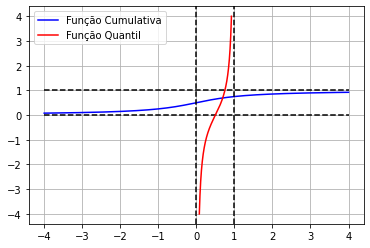

In [ ]:
def Fc(x,mu,gamma):
    '''
    Função cumulativa da distribuição de Cauchy
    '''
    return (1/pi)*arctan((x-mu)/gamma) + 1/2

def Qc(y,mu,gamma):
    '''
    Função Quantil da distribuição de Cauchy
    '''
    return gamma*tan(pi*(y-0.5)) + mu

CauchVals = linspace(-4,4,1000)
plot(CauchVals,Fc(CauchVals,0,1),"b",label="Função Cumulativa")
plot(Fc(CauchVals,0,1),Qc(Fc(CauchVals,0,1),0,1),"r",label="Função Quantil")
axvline(x=0,color="k",linestyle="--")
axvline(x=1,color="k",linestyle="--")
hlines(y=0,xmin=-4,xmax=4,color="k",linestyle="--")
hlines(y=1,xmin=-4,xmax=4,color="k",linestyle="--")
legend(),grid();

5. Implemente um método de inversão para gerar números aleatórios com a distribuição $\rho_{\text{C}}\left(x;\mu,\gamma\right)$. Represente um histograma para uma amostragem, que mostre claramente que a amostragem está distribuída de acordo com $\rho_{\text{C}}$. Use $\mu=0.5$ e $\gamma=1$ e utilize uma representação apropriada.

Usando a função cumulativa da distribuição podemos, usando o método da inversão, gerar números ($r$) que segeum uma distribuição de Cauchy $\rho_c(x;\mu,\gamma)$:

$$ r = \frac{1}{\pi}\arctan\left(\frac{x-\mu}{\gamma} \right)+\frac{1}{2} $$

Então, a função geradora será:

$$ c^{-1}(r)=\gamma \tan \left( \pi(r-\frac{1}{2})\right)+\mu $$

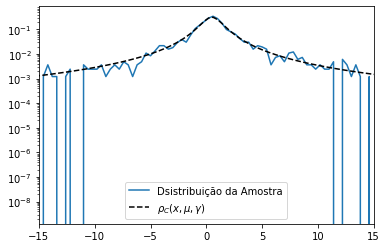

In [ ]:
def GeraCauchy(N,mu,gamma):
    '''
    Gera números aleatórios que seguem uma distribuição de Cauchy
    '''
    return gamma*tan(pi*(rd.random_sample(N)-0.5)) + mu

x1,y1 = hist(GeraCauchy(2048,0.5,1),-10000,10000,50000)
plot(x1,y1,label="Dsistribuição da Amostra")
plot(x1,1/(np.pi*((x1-0.5)**2+1**2)),'--',c='k',label=r'$\rho_C(x,\mu,\gamma)$')
xlim(-15,15)
yscale('log')
legend();

6. Utilize as rotinas anteriores para gerar realizações aleatórias para o estimador do valor médio,
\begin{equation}
\bar{X}_{N}=\frac{1}{N}\sum_{n=1}^{N}x_{i},
\end{equation}
com $N$ variáveis, onde $x_{i}$ são as variáveis aleatórias de Cauchy.

Código é semelhante ao que foi elaborado no exercício 2.

In [ ]:
def XnCauchy(M,N,mu,gamma):
    Estims = zeros(M)
    for i in range(M):
        variaveis = GeraCauchy(N,mu,gamma)
        Estims[i] = sum(variaveis)/N
    return Estims

7. Utilizando $\mu=0$ e $\gamma=1$, calcule o erro quadrático médio na determinação de $\left\langle x \right\rangle_{\rho_{\text{C}}}$ e identifique qual o comportamento assimptótico desse erro com $N$.

Como se vê no gráfico abaixo, o erro quadrático médio oscila sempre em torno de um valor, não havendo uma dependência do tamanho da amostra.

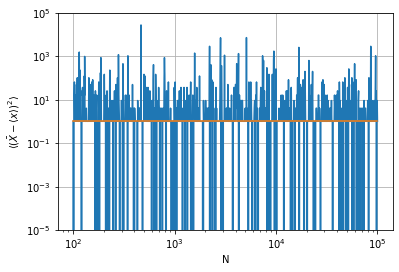

In [ ]:
NserroC = np.logspace(2,5,1000,dtype=int)
EstimadoresC = NserroC*0
for i in range(len(NserroC)):
    EstimadoresC[i] = sum(GeraCauchy(int(Nserro[i]),0,1))/int(NserroC[i])

plot(NserroC,(EstimadoresC-1)**2)
plot(NserroC,ones(len(NserroC)))
xscale('log')
xlabel('N')
yscale('log')
ylim(10**-5,10**5)
ylabel(r'$\langle (\bar{X}-\langle x \rangle)^2\rangle$')
grid();

8. Utilizando $\mu=0$, $\gamma=1.0$ e $N=4,16,64,256$. Faça os histogramas de $\bar{X}_{N}$ e prove que a distribuição assimptótica em N, não é uma Gaussiana (isto é, o Teorema de Limite Central não se aplica a $\rho_{\text{C}}$). Qual é a distribuição de $\bar{X}_{N\to\infty}$, neste caso?

#Responda Aqui

Como se verifica pela representação gráfica,a distribuição de Cauchy não tende para uma distribuição Gaussianaquando o N tende para infinito, contrariamente ao que acontecia com a distribuição exponencial. Em vez disso, com o aumento de N, a distribuição tende sempre para uma distribuição de Cauchy, o que se deve aos facto de, como foi visto nas alíneas anteriores, os momentos da distribuição não estarem bem definidos.


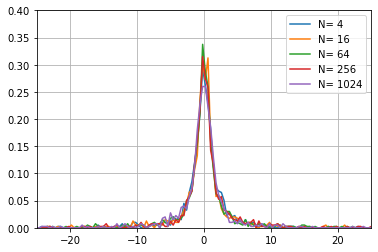

In [ ]:
Nsc = [4,16,64,256,1024]
for i in range(len(Nsc)):
    xc,yc = hist(XnCauchy(1000,Ns[i],0,1),-10000,10000,50000)
    plot(xc,yc,label="N= "+str(Nsc[i]))
    xlim(-25,25)
    ylim(0,0.4)
    legend()
    grid()

print("Como se verifica pela representação gráfica,a distribuição de Cauchy não tende para uma distribuição Gaussiana"
      "quando o N tende para infinito, contrariamente ao que acontecia com a distribuição exponencial. Em vez disso, "
      "com o aumento de N, a distribuição tende sempre para uma distribuição de Cauchy, o que se deve aos facto de, "
      "como foi visto nas alíneas anteriores, os momentos da distribuição não estarem bem definidos.")

# Problema 4

Uma primeira generalização para a distribuição de Cauchy é dada por

\begin{equation}
\rho_{\text{C,4}}\left(x;\mu,\gamma\right)=\frac{2\gamma^{3}}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)^{2}},
\end{equation}
que agora tem caudas que se comportam como $x^{-4}$ assimptoticamente.
1. Mostre que o primeiro e segundo cumulantes são finitos (calcule-os analiticamente) e que todos os outros são infinitos;

O primeiro cumulante da distribuição é dado por:

$$ \langle x\rangle_{C,4}=\int_{-\infty}^{+\infty}x\frac{2\gamma^{3}}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)^{2}}dx $$

fazendo a mudança de variável: $a=\frac{x-\mu}{\gamma}$:

$$ \langle x\rangle_{C,4}=\frac{2\gamma}{\pi}\int_{-\infty}^{+\infty}\frac{a}{(a^2 +1)^2}da + \frac{2\mu}{\pi}\int_{-\infty}^{+\infty}\frac{1}{(a^2 +1)^2}da $$

em que o primeiro integral é nulo já que temos o produto de uma função par por uma função ímpar. Assim, ficamos apenas com o segundo integral, no qual podemos faze a mudança de variável $a=\tan\theta$:

$$ \langle x\rangle_{C,4}= \frac{2\mu}{\pi}\int_{-\pi/2}^{\pi/2}\cos^2\theta d\theta=\mu$$

O momento de segunda ordem é dado por:

$$ \langle x^2\rangle_{C,4}=\int_{-\infty}^{+\infty}x^2\frac{2\gamma^{3}}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)^{2}}dx $$

fazendo a mesma mudança variável que foi feita para o momento de primeira ordem ficamos com:

$$ \langle x^2\rangle_{C,4}=\int_{-\infty}^{+\infty}\left(\frac{(a\gamma)^2}{(a^2+1)^2}+\frac{2a\gamma\mu}{(a^2+1)^2}+\frac{\mu^2}{(a^2+1)^2} \right)da $$

eliminando os integrais cujas funções integrandas não têm contribuição e fazendo a mudança de variável $a=\tan\theta$, fica-se com:

$$ \langle x^2\rangle_{C,4}=\frac{2}{\pi}\gamma^2\int_{-\pi/1}^{\pi/2}\sin^2\theta d\theta =\gamma^2$$

Relativamente aos momentos de ordem superior, é de notar que os integrais que foram eliminados nos cálculos anteriores vão ser divergentes para casos em que função tenha funções integrandas proporcionais a $x^3$ e potências de ordem superior, fazendo com que os momentos de ordem igual ou superior a 3 sejam infinitos

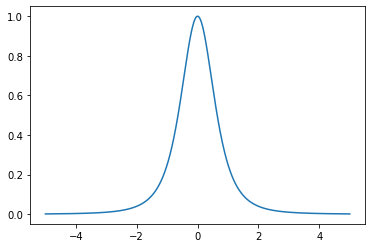

In [ ]:
# esta célula serve apenas para verificar o caráter simétrico da função densidade probabilidade
teste = linspace(-5,5,1000)
plot(teste,1/(teste**2 +1)**2);

2. Implemente um método de aceitação/recusa para gerar amostras com esta distribuição, propondo com distribuíção de Cauchy, geradas pelo método implementado na alínea 3.5.

Queremos usar o método da aceitação e da recusa para gerar amostras da distribuição:

$$  \omega(x)=\frac{2\gamma^{3}}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)^{2}} $$

propondo uma distribuição de Cauchy (exercício anterior):

$$ E(x)= \frac{\gamma}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)}$$

Sabemos que os pontos que vão seguir esta distribuição, tendo em conta a proposta, vão ter uma dada probabilidade associada:

$$ P(A|x)=\frac{\omega(x)}{E(x)}C $$

Uma vez que $\forall x, 0 \leq P(A|x) \leq 1$, $C$ vai ser dado pel máximo de $ \frac{\omega(x)}{E(x}$:

$$ \frac{\omega(x)}{E(x)}=\frac{\frac{2\gamma^{3}}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)^{2}}}{\frac{\gamma}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)}} =\frac{2\gamma^2}{(x-\mu)^2+\gamma^2}$$

que tem valor máximo quando $x=\mu$, logo $C=2$. Assim:

$$ P(A|x)=\frac{\gamma^2}{\gamma^2 + (x-\mu)^2} $$

In [ ]:
# Função usada em 3.5.: GeraCauchy(N,mu,gamma)

def A_R_Cauchy(N,mu,gamma):
    '''
    Gera uma amostra com a distribuição de Cauchy do enunciado, propondo com a distribuição de Cauchy do ex anterior
    N: tamanho da amostra
    mu,gamma: parâmetros da distribuição de Cauchy
    '''
    Sample = array([])
    while(Sample.size < N):
        x = GeraCauchy(N,mu,gamma) # proposta com a dist. de Cauchy do usando função do ex. 3.5
        results, = where(rd.random_sample(N) < (gamma**2)/(gamma**2 + (x-mu)**2)) #  P(A|x)
        results = x[results]
        Sample= concatenate((Sample,results))
    return Sample[0:N]

3. Utilize a rotina da alínea 4.2 para gerar realizações aleatórias para o estimador do valor médio,

\begin{equation}
\bar{X}_{N}=\frac{1}{N}\sum_{n=1}^{N}x_{i},
\end{equation}

com $N$ variáveis. Utilizando $\mu=0$ e $\gamma=1$, calcule o erro quadrático médio na determinação de $\left\langle x\right\rangle_{\rho_{\text{C}}}$ e identifique qual o comportamento assimptótico desse erro com $N$.

#Responda Aqui

Verifica-se que com o aumento do número de experiências o erro quadrático médio diminui muito rapidamente,sendo inversamente proporcional ao tamanho da amostra


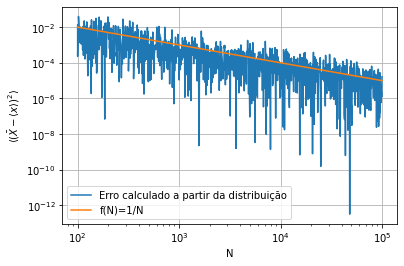

In [ ]:
mu4,gamma4 = 0,1
N4 = logspace(2,5,1000,dtype=int)
Xn4 = 0.*N4

for i in range(1000):
    Xn4[i]=sum(A_R_Cauchy(N4[i],mu4,gamma4))/N4[i]

plot(N4,(Xn4-mu4)**2,label='Erro calculado a partir da distribuição')
plot(N4,1/N4,label='f(N)=1/N')
xscale('log')
xlabel('N')
yscale('log')
ylabel(r'$\langle (\bar{X}-\langle x \rangle)^2\rangle$')
legend()
grid();

print("Verifica-se que com o aumento do número de experiências o erro quadrático médio diminui muito rapidamente,"
      "sendo inversamente proporcional ao tamanho da amostra")

4. Prove numericamente que a distribuição de $\bar{X}_{N\to\infty}$ é gaussiana e comente o resultado à luz da prova genérica do Teorema do Limite Central abordada nas aulas.

Verifica-se então, que com o aumento do $N$, a distribuição do estimado do valor médio da distribuição, é uma Gaussiana, tal como o Teorema do Limite Central previa.

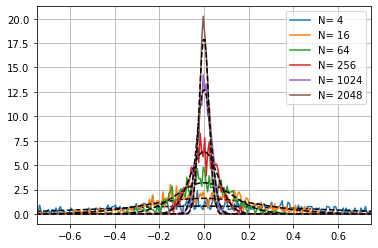

In [ ]:
def Xn4(M,N,mu,gamma):
    Estims = zeros(M)
    for i in range(M):
        variaveis = A_R_Cauchy(N,mu,gamma)
        Estims[i] = sum(variaveis)/N
    return Estims

Ns = [4,16,64,256,1024,2048]
Xns = array([zeros(1000),zeros(1000),zeros(1000),zeros(1000),zeros(1000)])
for i in range(len(Ns)):
    xn,yn = hist(Xn4(1000,Ns[i],mu4,gamma4),-100,100,30000)
    plot(xn,yn,label='N= '+str(Ns[i]))
    plot(xn,Gauss(xn,mu4,gamma4/sqrt(Ns[i])),"k--") # verificar que se aproximam de uma distribuição Gaussiana
    legend()
    xlim(-.75,.75)
grid()